# Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

# Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

In [50]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# import function for lasso regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the data file 
df_insurance = pd.read_csv('healthinsurance.csv')

In [3]:
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000000,male,64,24.300000,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600000
1,49.000000,female,75,22.600000,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000000
2,32.000000,female,64,17.800000,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200000
3,61.000000,female,53,36.400000,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600000
4,19.000000,female,50,20.600000,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700000


In [4]:
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [5]:
# Smoker, Diabetes and regularex needs to be made as categorical 

In [6]:
df_insurance['smoker']= df_insurance['smoker'].astype(object)
df_insurance['diabetes']= df_insurance['diabetes'].astype(object)
df_insurance['regular_ex']= df_insurance['regular_ex'].astype(object)

In [7]:
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

In [8]:
df_insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,14604.000000,39.547521,14.015966,18.000000,27.000000,40.000000,52.000000,64.000000
weight,15000.000000,64.909600,13.701935,34.000000,54.000000,63.000000,76.000000,95.000000
bmi,14044.000000,30.266413,6.122950,16.000000,25.700000,29.400000,34.400000,53.100000
no_of_dependents,15000.000000,1.129733,1.228469,0.000000,0.000000,1.000000,2.000000,5.000000
bloodpressure,15000.000000,68.650133,19.418515,0.000000,64.000000,71.000000,80.000000,122.000000
claim,15000.000000,13401.437620,12148.239619,1121.900000,4846.900000,9545.650000,16519.125000,63770.400000


In [9]:
# from here it can be seen that blood pressure has zero values

In [10]:
df_insurance.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [11]:
# age and BMI has missing values 

In [12]:
df_insurance.shape

(15000, 13)

<AxesSubplot:xlabel='age'>

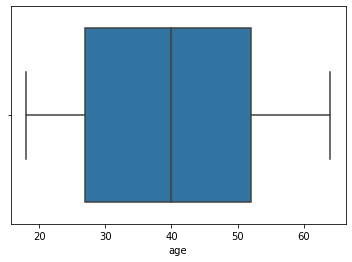

In [13]:
sns.boxplot(df_insurance['age'])

In [14]:
# for age we can do mean imputation 

<AxesSubplot:xlabel='bmi'>

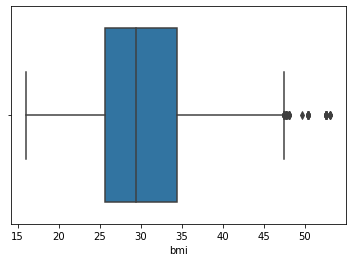

In [15]:
sns.boxplot(df_insurance['bmi'])

<AxesSubplot:>

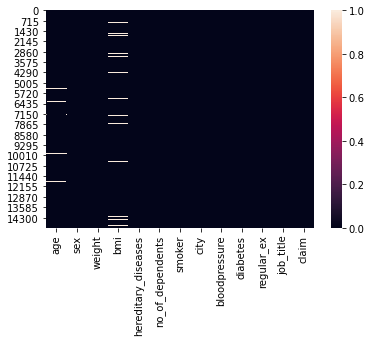

In [16]:
sns.heatmap(df_insurance.isnull())

In [17]:

median_bloodpressure = df_insurance['bloodpressure'].median()
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure) 

In [21]:
df_insurance['age'].replace(to_replace=np.nan, value =np.mean(df_insurance['age']),inplace=True)
df_insurance['bmi'].replace(to_replace=np.nan, value =df_insurance['bmi'].median(), inplace=True)

<AxesSubplot:>

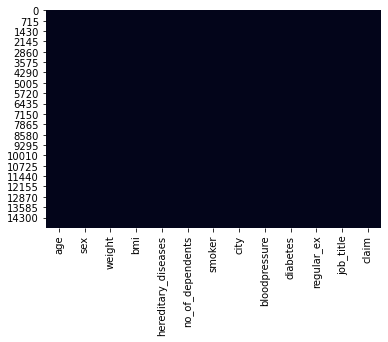

In [23]:
sns.heatmap(df_insurance.isnull(), cbar= False)

In [24]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [25]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [26]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [27]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [31]:
df_num = df_insurance.select_dtypes(include = [np.number])
df_cat = df_insurance.select_dtypes(include = [np.object])
df_cat =df_cat.drop('city', axis =1)

In [32]:
# Dummy Encoding of Categorical 
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [33]:
dummy_var.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df_target = np.log(df_num['claim'])

df_num = df_num.drop('claim', axis = 1)

In [35]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()

In [36]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [38]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [39]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [40]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [41]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [42]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [43]:

linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.7496614323025869

In [44]:
smmodel = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [45]:
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     568.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:59:05   Log-Likelihood:                -7617.9
No. Observations:               10500   AIC:                         1.535e+04
Df Residuals:                   10444   BIC:                         1.575e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3106      0.064      4.857      0.000       0.185       0.436
age                                  0.5215      0.006     94.017      0.000       0.511       0.532
weight                              -0.0022      0.005     -0.397      0.692      -0.013       0.009
bmi                                  0.0458      0.005      8.746      0.000       0.036       0.056
no_of_dependents                     0.1275      0.005     25.196      0.000       0.118       0.137
bloodpressure                        0.0155      0.005      3.090      0.002       0.006       0.025
sex_male                            -0.0940      0.010     -9.198      0.000      -0.114      -0.074
hereditary_diseases_Arthritis        0.1678      0.085      1.982      0.048       0.002       0.334
hereditary_diseases_Cancer          -0.3496      0.079     -4.452      0.000      -0.503      -0.196
hereditary_diseases_Diabetes        -0.2165      0.070     -3.090      0.002      -0.354      -0.079
hereditary_diseases_Epilepsy        -0.2933      0.084     -3.475      0.001      -0.459      -0.128
hereditary_diseases_EyeDisease      -0.2750      0.076     -3.627      0.000      -0.424      -0.126
hereditary_diseases_HeartDisease    -0.0552      0.081     -0.684      0.494      -0.213       0.103
hereditary_diseases_High BP         -0.4097      0.089     -4.615      0.000      -0.584      -0.236
hereditary_diseases_NoDisease       -0.7270      0.052    -14.095      0.000      -0.828      -0.626
hereditary_diseases_Obesity         -0.3084      0.071     -4.349      0.000      -0.447      -0.169
smoker_1                             1.4758      0.015    101.578      0.000       1.447       1.504
diabetes_1                           0.0889      0.012      7.457      0.000       0.066       0.112
regular_ex_1                         0.0320      0.012      2.670      0.008       0.009       0.056
job_title_Accountant                 0.1008      0.049      2.074      0.038       0.006       0.196
job_title_Actor                      0.0642      0.042      1.530      0.126      -0.018       0.146
job_title_Analyst                   -0.0159      0.053     -0.302      0.763      -0.119       0.088
job_title_Architect                  0.0452      0.047      0.953      0.341      -0.048       0.138
job_title_Beautician                 0.0663      0.048      1.392      0.164      -0.027       0.160
job_title_Blogger                   -0.0627      0.051     -1.233      0.217      -0.162       0.037
job_title_Buisnessman                0.0347      0.053      0.656      0.512      -0.069       0.138
job_title_CA                         0.0543      0.051      1.059      0.290      -0.046       0.155
job_title_CEO                        0.0495      0.04

In [46]:
df_insurance['job_title'].value_counts()

Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Blogger               281
FilmDirector          281
Chef                  281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: job_title, dtype: int64

In [47]:
update_score_card(algorithm_name='Linear Regression', model = MLR_model)

In [48]:
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.749661,0.748343,0.511000,118.305795


In [56]:
Ridgecv = RidgeCV(alphas=(0.1,.5,1,2,5,10.0,15,20,25,30,35,40,44),cv=10)


In [57]:
Ridgecv = Ridgecv.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(Ridgecv))

RMSE on test set: 0.511


In [54]:
Lassocv = LassoCV(cv =5, eps =.05, n_alphas=100)

In [55]:
Lassocv = Lassocv.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(Lassocv))

RMSE on test set: 0.5311
